In [379]:
# 기본 라이브러리
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

# 모델평가를 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 오버샘플링을 위한 라이브러리
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# linear 모델 돌리기 위한 라이브러리
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# 랜덤포레스트 돌리기 위한 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random

# 부스팅 모델 돌리기 위한 라이브러리
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import catboost as catb
from sklearn import svm

In [281]:
tr = pd.read_csv(r"C:\Users\Wyatt\wyatt37\Data\hospital\train.csv")
te = pd.read_csv(r"C:\Users\Wyatt\wyatt37\Data\hospital\test.csv")
sub = pd.read_csv(r"C:\Users\Wyatt\wyatt37\Data\hospital\submission_sample.csv")

In [282]:
tr.shape, te.shape, sub.shape

((301, 58), (127, 58), (127, 2))

- train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 
- test.csv - 폐업 여부를 제외하고 train.csv와 동일 
- sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.
- ~-------------------------------------------------------------------------~
1. inst_id - 각 파일에서의 병원 고유 번호
2. OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
3. sido – 병원의 광역 지역 정보
4. sgg – 병원의 시군구 자료
5. openDate – 병원 설립일
6. bedCount - 병원이 갖추고 있는 병상의 수
7. instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
   - 종합병원 : 입원환자 100명 이상 수용 가능
   - 병원 : 입원 환자 30명 이상 100명 미만 수용 가능
   - 의원 : 입원 환자 30명 이하 수용 가능
   - 한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

8. revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
9. salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
10. sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
11. salary1 – 급여, 2017(회계년도)년 데이터를 의미함
12. noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
13. noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
14. Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
15. ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
16. Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
17. liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
18. quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
19. receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
20. inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
21. nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
22. tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
23. OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
24. receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
25. debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
26. liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
27. shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
28. NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
29. longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
30. netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
31. surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

32. revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
33. salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
34. sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
35. salary2 – 급여, 2016(회계년도)년 데이터를 의미함
36. noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
37. noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
38. interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
39. ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
40. profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
41. liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
42. quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
43. receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
44. inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
45. nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
46. tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
47. OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
48. receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
49. Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
50. liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
51. shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
52. NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
53. longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
54. netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
55. surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
56. employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
57. employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
58. ownerChange – 대표자의 변동 

# 0. 데이터 이해

## 0.1 사전 개념 정리
- 거진 50개의 칼럼이 있지만 정리해보면 얼마 되지 않는다.
    - 매출액 : 그냥 전체 매출액입니다. 여기서 영업외수익은 제외되는지는 모르겠습니다. 그러나 영업외수익이 많지 않을 것이므로 크게 의미는 없습니다.
    - 매출원가 : 매출액에서 매출원가를 빼면 영업이익이 나옵니다.
    - 판관비(급여 포함): 급여가 포함됩니다. 기타 영업비용이 포함됩니다.
    - 영업외수익 : 영업활동이 아닌 수익을 의미합니다.
    - 영업외비용(이자비용 포함) : 영업활동이 아닌 비용을 의미합니다. 이자비용이 포함됩니다.
    - 법인세비용 : 매출액에 따른 법인세입니다. 영업이익에서 법인세비용을 빼면 순이익이 됩니다.
    - 당기순이익 : 매출액-매출원가-판관비-법인세비용 = 당기순이익 입니다. 이 순이익이 높아야 돈을 법니다.
    - 이익잉여금 : 순이익보다 하위개념으로 남는 잉여수익입니다.
    - 순자산총계(유동자산, 비유동자산 포함) : 전체 자산을 의미합니다.
        - 유동자산(당좌자산, 미수금(단기), 재고자산 포함) : 1년 내 현금으로 전환할 수 있는 자산을 의미합니다.
        - 비유동자산(유형자산, 기타 비유동자산, 장기미수금) : 1년 내 현금으로 전환할 수 없는 자산을 의미합니다.
    - 부채총계(유동부채, 비유동부채 포함) : 부채의 총합입니다.
        - 유동부채(단기차입금 포함) : 마찬가지로 1년 내 상환해야 할 부채입니다.
        - 비유동부채(장기차입금 포함) : 1년 이후에 상환해야 할 부채입니다.

## 0.2 중요 변수 설정

- 그럼 이 수 많은 변수 중에 중요한 건 뭘까? 폐업으로 이어지는 아주 직접적인 요인은 두개라고 할 수 있다.
    1. 먼저 매출이 줄어든다. 즉 장사가 잘 안된다.
    2. 빚이 늘어난다. 그 중에서도 단기로 갚아야 할 유동부채가 늘어난다. 물론 유동부채는 매출로 메꿀 수 있지만, 매출이 줄어들면 배가 터지게 된다.
    3. 비유동부채는 투자의 관점에서 그렇게 큰 리스크는 아니라고 볼 수 있다.
    
        1. 16-17 매출 변화량 분석
        2. 16-17 유동부채 변화량 분석
        3. 부채총계 대비 유동부채 비율 분석


- 또 뭐가 중요할까?
    1. 매출도 중요하지만, 순이익도 중요하다. 순이익 비율이 매우 낮고, 그 금액이 적으면 당연히 남는 돈이 없을 수 밖에 없다.
    2. 그런 측면에서 급여도 매우 중요하다. 매출이 없는데 급여가 많으면 직원을 구조조정 해야 한다.
    
        1. 직원당 평균 급여 분석
        2. 매출대비 영업이익률 분석
        3. 영업이익률 대비 순익률 분석
    
    
- 그 다음은?
    1. 유동자산 비율이 매우 중요하다. 유동자산은 빠르게 현금화를 시킬 수 있는 것들인데, 유동자산이 많으면 단기적 리스크를 해소할 수 있다.
    2. 비유동자산 비율이 높으면 좋지 않다. 빠르게 현금화를 시킬 수 없는 자산은 리스크 해소에 도움이 되지 않는다.
    3. 유동부채와 유동자산이 상계가 되는지 여부도 중요할 것이다. 따라서 유동자산-유동부채= +- 여부도 중요할 것이다.
    
        1. 총자산 대비 유동자산 비율 분석
        2. 유동자산-유동부채의 +-여부

## 0.3 키 퀘스쳔

1. 16년도에 비해 17년도에 매출이 줄어든 병원은 폐업에 영향이 있을까?
2. 유동부채 비율이 크거나, 전년도에 비해 부채가 늘어난 병원은 폐업에 영향이 있을까?
3. 직원당 평균 급여가 많은 병원은 폐업에 영향이 있을까?
4. 매출대비 영업이익률이 낮거나, 전년도에 비해 줄어든 병원은 폐업에 영향이 있을까?
5. 마찬가지로 영업이익대비 순익이 낮거나, 전년도에 비해 줄어든 병원은 폐업에 영향이 있을까?
6. 총자산 대비 유동자산 비율이 낮으면 폐업에 영향이 있을까?
7. 유동부채 대비 유동자산 비율이 +-이면 폐업에 영향이 있을까?

## 0.4 결측치 처리에 관하여

본 데이터셋은 결측치가 매우 많으며, tr,te에서 같은 변수도 데이터타입이 다른 문제가 있다. 따라서 결측치를 어떻게 처리하느냐가 관건이다.

1. 회계자료 결측치 채우는 방법에 대한 고찰
    1. 첫 번째 방법은, instkind의 병원 종류별로 병원의 규모가 나뉠 것이다. 따라서 groupby(tr["instkind"])를 통해서 평균값을 넣어주는 방법이 있다.
    2. 두 번째 방법은 병원 종류별로 나누지 않고 전체 평균으로 채울 수도 있을 것이다.
    

2. 침대의 수(bedCount)의 결측치 채우는 방법에 대한 고찰
    1. 위와 동일한 고민이다.


3. 병원종류(instkind)의 결측치 채우는 방법에 대한 고찰
    - 병원 종류는 입원환자 수용정도에 따라 달라진다. 따라서 bedCount가 아주 중요하다. 그러나 bedCount가 동시에 없는 row도 있다.
    1. 일단 bedCount를 기준으로 나눠서 채워준다.
    2. bedCount가 없을 경우 employee를 통해 유추할 수 밖에 없다.
    3. 마지막 방법은, 어렵겠지만, 회계 데이터 분석을 통해 대표변경 여부를 분류 분석하는 것이다.
    

4. 임직원 수(employee)의 결측치 채우는 방법에 대한 고찰
    1. 마찬가지로 병원 종류에 맞춰 평균값을 넣어주는 방법이 있다.
    2. 만약 병원 종류가 없다면, 급여액을 통해서 몇명일지를 유추할 수 있다.


5. 대표변경(ownerChange)의 결측치 채우는 방법에 대한 고찰
    1. 첫 번째 방법은, 가장 높은 빈도수를 가지는 밸류로 채우는 것이다. 아마도 same 일 것이다.
    2. 두 번째 방법은, 바로 전 데이터 포인트의 밸류로 채우는 것이다.
    3. 세 번째 방법은, 어렵겠지만, 회계데이터 분석을 통해 대표변경 여부를 분류 분석하는 것이다.
    4. 마지막 방법은, 지워버리는 것이다. 그러나 애초에 데이터가 400개도 안되는데 지우면 더더욱 분석이 힘들어진다.
    
    
6. 오픈시기(openDate)의 결측치 채우는 방법에 대한 고찰
    - te 테이블에 openDate 결측치가 딱 하나 있는데, 이걸 어떻게 채워야 될 것인가 고민해보자.
    1. openDate는 다른 자료를 통해 유추하기 가장 힘든 변수이다. ffill, bfill을 통해서 넣은 게 나을 것 같다.

## 0.6 이상치 처리에 관하여

본 데이터셋은 이상치도 매우 많은데, 과연 이것을 어떻게 해결을 해야 하는가?

1. 그냥 둔다.
2. 좀 더 낮은 값으로 조정한다.
3. 그룹별로 이상치를 살펴봐서 조정한다.
4. 표준화를 한다!!!!!!!! 너로 정했다!!!!!!!

## 0.7 마지막 고민, Goal에 대하여

그란데 말입니다. 정말 폐업이라는 게 망해서 폐업이 이루어질까? 그렇지 않을 수도 있잖아. 장사가 너무 잘되어서 접고 다른데로 옮긴 거면..? 아니면 그냥 임대인이랑 싸워서..?

## 0.8 테이블 살펴봅시다. 사실 그 전에 살펴봤습니다만

In [5]:
tr.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [6]:
te.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
122,424,NaN,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.0,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560,NaN,NaN
123,425,NaN,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.0,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132,137,same
124,429,NaN,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
125,430,NaN,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.0,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363,343,same
126,431,NaN,choongbuk,163,19961216.0,96.0,hospital,1.092444e+10,1.168731e+09,8.709839e+09,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [7]:
tr.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [8]:
te.describe()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.000000,0.0,127.000000,1.260000e+02,119.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,...,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,205.905512,NaN,95.858268,2.005085e+07,172.789916,1.824446e+10,3.973321e+09,1.340410e+10,7.415084e+09,5.175513e+08,...,1.336209e+10,3.513831e+08,1.973114e+04,1.189851e+10,5.633432e+09,2.181713e+09,6.495026e+09,4.482682e+09,6.116179e+09,1.648474e+09
std,131.801765,NaN,52.684253,8.795815e+04,126.024471,3.133530e+10,1.419948e+10,2.054481e+10,1.210043e+10,1.193139e+09,...,2.085404e+10,9.791097e+08,2.206009e+05,1.971182e+10,9.662048e+09,4.952449e+09,1.203673e+10,7.517020e+09,9.813461e+09,4.779444e+09
min,2.000000,NaN,6.000000,1.976041e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.955957e+09,-8.600000e+09
25%,89.000000,NaN,51.000000,2.000083e+07,94.000000,3.235889e+09,0.000000e+00,3.083860e+09,1.666742e+09,1.641094e+07,...,2.807763e+09,0.000000e+00,0.000000e+00,1.679896e+09,3.914156e+08,0.000000e+00,1.321368e+08,0.000000e+00,9.492656e+08,0.000000e+00
50%,199.000000,NaN,95.000000,2.007107e+07,156.000000,6.637116e+09,1.896923e+08,5.716502e+09,3.263054e+09,5.319171e+07,...,5.450483e+09,3.317377e+07,0.000000e+00,4.494217e+09,1.554506e+09,3.000000e+08,2.030000e+09,1.750000e+09,2.427139e+09,0.000000e+00
75%,328.000000,NaN,144.500000,2.011790e+07,213.000000,1.704039e+10,1.192329e+09,1.445243e+10,7.198103e+09,3.714592e+08,...,1.187114e+10,2.048998e+08,0.000000e+00,1.412031e+10,6.586241e+09,2.650000e+09,5.700000e+09,4.857048e+09,5.881965e+09,6.935165e+08
max,431.000000,NaN,177.000000,2.017053e+07,771.000000,1.810000e+11,1.160000e+11,1.270000e+11,8.239561e+10,7.302719e+09,...,1.130000e+11,7.112780e+09,2.466393e+06,1.310000e+11,5.241427e+10,3.714334e+10,7.855654e+10,3.620288e+10,4.924492e+10,2.561787e+10


In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [10]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

# 1. EDA 및 전처리

## 1.1 OC칼럼 정리

OC칼럼은 train 밖에 없으니 따로 함수로 만들지는 않겠습니다.

In [283]:
# 폐업은 0, 유지는 1로 하겠습니다.
tr['OC'].replace({'open':1,' close':0}, inplace=True)

In [284]:
tr["OC"].value_counts()

1    286
0     15
Name: OC, dtype: int64

## 1.2 sido, sgg 칼럼 정리

In [285]:
tr["sido"].value_counts()

gyeonggi     49
gyeongbuk    39
gyeongnam    35
busan        26
choongnam    23
jeonnam      21
seoul        19
jeonbuk      18
daegu        14
choongbuk    13
daejeon      13
incheon      10
gangwon      10
ulsan         8
gwangju       2
sejong        1
Name: sido, dtype: int64

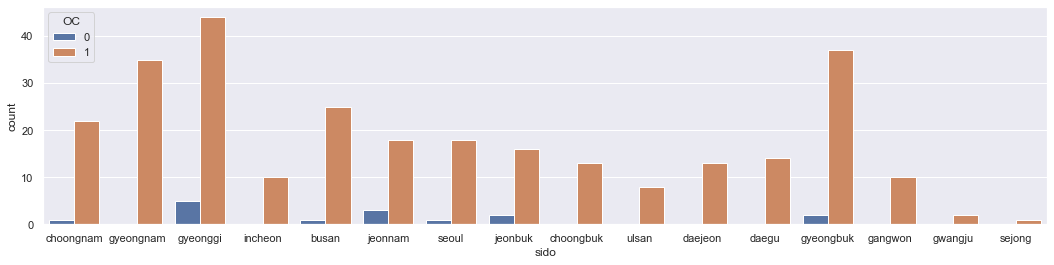

In [286]:
figure(figsize=(18, 4))
sns.countplot(data=tr, x="sido", hue="OC")
plt.show()

In [287]:
pd.pivot_table(tr, index="sido", values="OC")

,OC
sido,
busan,0.961538
choongbuk,1.000000
choongnam,0.956522
daegu,1.000000
daejeon,1.000000
gangwon,1.000000
gwangju,1.000000
gyeongbuk,0.948718
gyeonggi,0.897959


In [288]:
# sgg와 sido는 관계가 없어보인다. 같은 경기인데 하나는 89, 하나는 169다.

tr[["sido", "sgg"]]

,sido,sgg
0,choongnam,73
1,gyeongnam,32
2,gyeonggi,89
3,incheon,141
4,gyeongnam,32
...,...,...
296,jeonnam,178
297,choongnam,159
298,gyeongbuk,107
299,gyeonggi,169


In [289]:
tr["sgg"].value_counts()

32     13
114     6
169     6
26      6
8       6
       ..
106     1
107     1
108     1
109     1
1       1
Name: sgg, Length: 155, dtype: int64

## 1.3 opendate 칼럼 정리

### 1.3.1 open_year, open_month 파생변수 생성

In [290]:
def open_date(df):
    # null 값이 있으니 일단 임시값을 채워줍니다.
    df['openDate'].fillna(value=20000101.0, inplace=True)
    
    # 연, 월을 나눠줍니다.
    df["open_year"] = df["openDate"].apply(lambda x: str(x)[:4])
    df["open_month"] = df["openDate"].apply(lambda x: str(x)[4:6])

In [291]:
open_date(tr)
open_date(te)

In [292]:
tr[['open_year', 'open_month']].head()

,open_year,open_month
0,2007,12
1,1997,04
2,2016,12
3,2000,08
4,2005,09


In [293]:
te[['open_year', 'open_month']].head()

,open_year,open_month
0,1998,11
1,2016,03
2,1989,04
3,2010,02
4,2004,06


In [294]:
tr[['open_year', 'open_month']].isnull().sum()

open_year     0
open_month    0
dtype: int64

In [295]:
te[['open_year', 'open_month']].isnull().sum()

open_year     0
open_month    0
dtype: int64

### 1.3.2 openDate 시각화

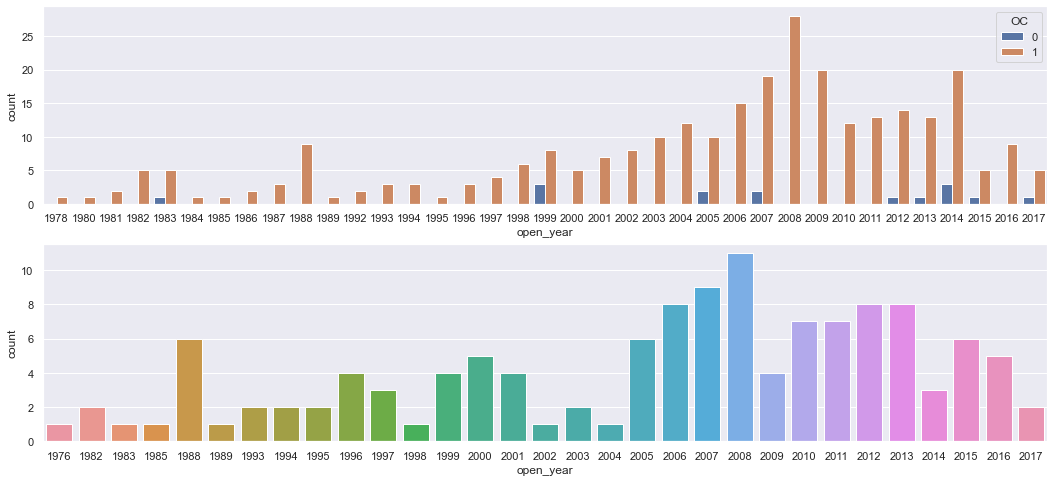

In [296]:
figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

sns.countplot(data=tr, x="open_year", hue="OC", ax=ax1)
sns.countplot(data=te, x="open_year", ax=ax2)
plt.show()

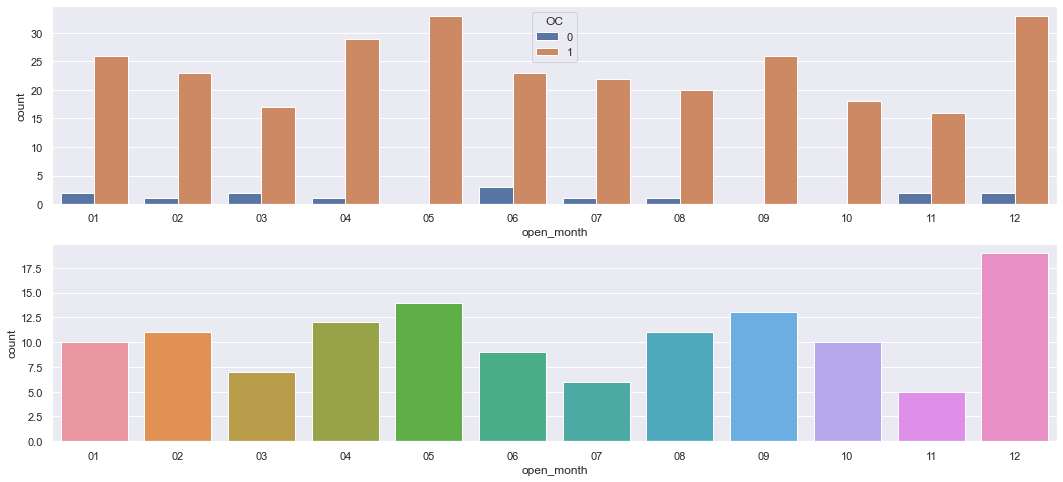

In [297]:
figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

sns.countplot(data=tr, x="open_month", hue="OC", ax=ax1)
sns.countplot(data=te, x="open_month", ax=ax2)
plt.show()

## 1.4 instkind 칼럼 정리

In [298]:
# 먼저 빈도수를 살펴봅니다.

tr["instkind"].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [299]:
# tr 의 null값

tr[tr["instkind"].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
193,281,0,gyeonggi,12,20121213,NaN,NaN,305438818.0,22416139.0,467475340.0,...,0.0,0.0,0.0,0.0,0.0,15.0,15.0,change,2012,12


In [300]:
# te의 null값

te[te["instkind"].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
120,413,NaN,gyeonggi,168,20000101.0,49.0,NaN,5.583625e+08,7.443415e+07,5.482900e+08,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,21,21,same,2000,01
125,430,NaN,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,0.0,2.871805e+10,2.563120e+10,-205062936.0,0.0,363,343,same,2001,02


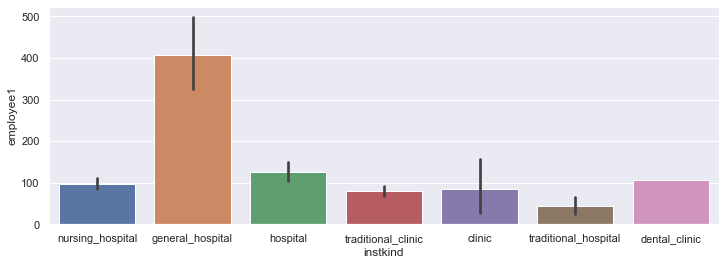

In [301]:
# instkind는 employee의 수치에 맞춰 null값을 넣어줄 것입니다.
# 다행히 3개의 null값이 모두 employee 값은 가지고 있군요.
from matplotlib.pyplot import figure

figure(figsize=(12,4))
sns.barplot(data = tr, x="instkind", y="employee1")
plt.show()

 - employee가 300명이 넘는 te테이블의 inst_id=430 은 누가 봐도 general_h 인줄 알겠습니다.
 - 그러나 다른 두 값은 employee가 15, 21명이므로 clinic인지 traditional_h 인지 사실 잘 모르겠습니다.
 - 자세히 살펴보겠습니다

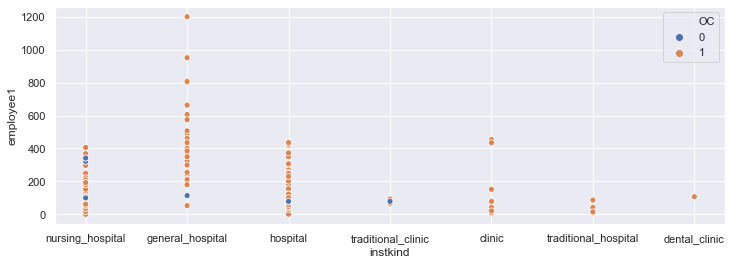

In [302]:
figure(figsize=(12,4))
sns.scatterplot(data = tr, x="instkind", y="employee1", hue="OC")
plt.show()

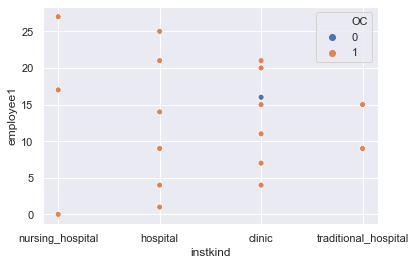

In [303]:
# 판다스의 색인(indexing) 기능을 활용하여, 운임요금(Fare)이 100달러 미만인 데이터만 가져옵니다.
# 이를 low_low_fare라는 변수에 할당합니다.
low_employee = tr[tr["employee1"] < 30]

# lmplot을 통해 나이(Age)와 운임요금(Fare)의 상관관계를 분석합니다.
# 이번에는 low_low_fare 데이터를 시각화 합니다.
sns.scatterplot(data=low_employee, x="instkind", y="employee1", hue="OC")
plt.show()
# 후보는 4곳이군요. nursing_h, hospital, clinic, traditional_h

In [304]:
te[te["instkind"].isnull()]["revenue1"]

120    5.583625e+08
125    4.892710e+10
Name: revenue1, dtype: float64

In [305]:
tr[tr["instkind"].isnull()]["revenue1"]

193    305438818.0
Name: revenue1, dtype: float64

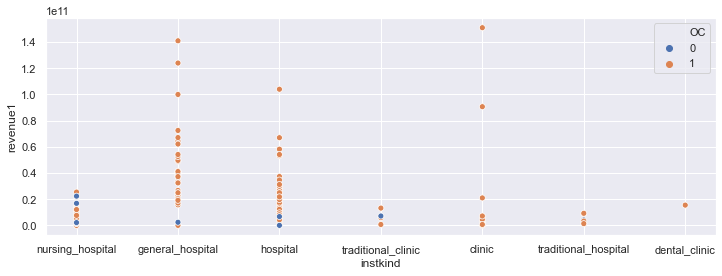

In [306]:
figure(figsize=(12,4))
sns.scatterplot(data = tr, x="instkind", y="revenue1", hue="OC")
plt.show()

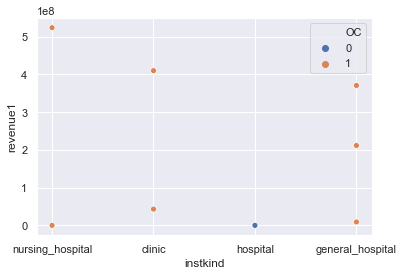

In [307]:
# 이를 low_low_fare라는 변수에 할당합니다.
low_rev = tr[tr["revenue1"] < 600000000]

sns.scatterplot(data=low_rev, x="instkind", y="revenue1", hue="OC")
plt.show()
# 후보 몇 개를 없앨 수 있을 것 같습니다.
# 일단 hospital은 없다고 볼 수 잇겠네요.
# general_h도 위에는 없던 후보로서 기각입니다.
# 그렇다면 clinic or nursing_h 입니다.

# 그러나 tr의 281번은 OC가 1입니다. 한 곳도 망한적없는 clinic보다는 nursing_h가 합리적으로 보입니다. 확정 땅땅땅
# te의 413번도 그냥 nursing_h로 넣어버립니다. 이제 그만 하고 싶어요 이런 추리.

결론
- tr의 inst_id=281번 nursing_h
- te의 inst_id=413번 nursing_h
- te의 inst_id=430번 은 누가 봐도 general_h 

In [308]:
tr.loc[tr["inst_id"] == 281, "instkind"] = "nursing_hospital"
te.loc[te["inst_id"] == 413, "instkind"] = "nursing_hospital"
te.loc[te["inst_id"] == 430, "instkind"] = "general_hospital"

In [309]:
tr["instkind"].value_counts()

nursing_hospital        145
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [310]:
te["instkind"].value_counts()

nursing_hospital        64
hospital                36
general_hospital        20
clinic                   4
traditional_clinic       2
traditional_hospital     1
Name: instkind, dtype: int64

## 1.5 bedCount 칼럼 정리

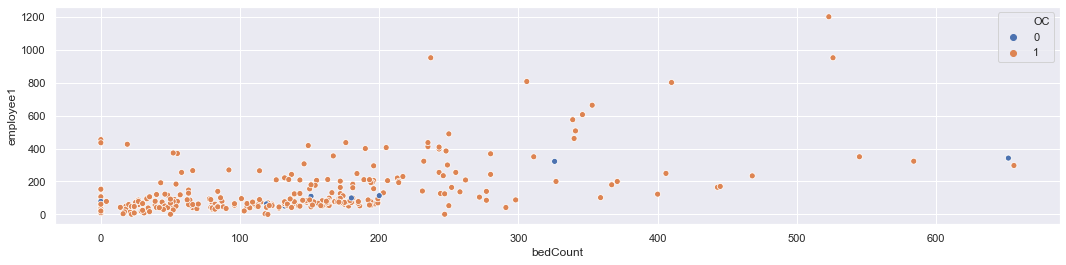

In [311]:
figure(figsize=(18, 4))
sns.scatterplot(data=tr, x="bedCount", y="employee1", hue="OC")
plt.show()

In [312]:
# 0을 가진 row들이 많네요, 한 번 살펴보겠습니다.
# 직원이 450명인데 침대가 하나도 없다는 건 조금 이상합니다.
# 직원이 100명이 넘는 nursing_h 인데 침대가 하나도 없기도 하고요.
# 추측컨데 0도 결측치와 다름 없는 값이 아닐까 합니다.

tr[tr['bedCount'] == 0]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
30,52,1,gyeonggi,96,20010202,0.0,traditional_clinic,1.320744e+10,2.301604e+09,1.026922e+10,...,5.764444e+09,2.500000e+07,0.000000e+00,4.454633e+09,0.0,93.0,95.0,same,2001,02
39,62,1,gyeonggi,120,20050224,0.0,clinic,1.510000e+11,9.850332e+10,4.954776e+10,...,0.000000e+00,8.676656e+09,0.000000e+00,2.846885e+10,43194221.0,454.0,425.0,same,2005,02
59,93,1,busan,64,19930807,0.0,nursing_hospital,9.351426e+09,7.237868e+08,8.059646e+09,...,4.295801e+09,7.081775e+09,6.800000e+09,4.506989e+09,0.0,108.0,108.0,same,1993,08
68,104,1,gyeonggi,80,20120518,0.0,clinic,2.600028e+09,2.147255e+08,2.483782e+09,...,2.730000e+09,4.136694e+08,0.000000e+00,1.868636e+09,259263363.0,40.0,40.0,same,2012,05
73,109,1,seoul,79,20120501,0.0,dental_clinic,1.547254e+10,9.405841e+09,5.046173e+09,...,2.361425e+09,7.118755e+09,7.118755e+09,5.762838e+09,0.0,107.0,109.0,same,2012,05
110,163,1,gyeonggi,18,20121220,0.0,clinic,2.097084e+10,1.146890e+10,8.325001e+09,...,1.345786e+09,4.486666e+09,2.230000e+09,1.790415e+09,0.0,152.0,127.0,same,2012,12
120,177,1,daejeon,47,19840218,0.0,clinic,1.889868e+09,1.128316e+08,1.694670e+09,...,1.078103e+09,0.000000e+00,0.000000e+00,8.421260e+08,0.0,35.0,32.0,same,1984,02
130,192,1,choongnam,28,20011221,0.0,traditional_clinic,5.961812e+09,5.770951e+09,0.000000e+00,...,9.296750e+08,1.167303e+09,9.958931e+08,8.035855e+08,0.0,67.0,67.0,same,2001,12
165,250,1,seoul,129,19800207,0.0,clinic,6.631601e+09,0.000000e+00,6.641613e+09,...,2.500000e+08,2.539125e+06,0.000000e+00,1.130185e+09,0.0,73.0,87.0,same,1980,02
178,266,1,jeonbuk,26,20040712,0.0,clinic,1.661012e+09,1.479668e+08,1.291294e+09,...,3.430056e+07,1.580000e+09,1.580000e+09,1.501697e+09,0.0,20.0,14.0,same,2004,07


In [313]:
# 위 데이터에서  clinic이 유독 많이 보인다 했는데, 고작 18개 중에 5개를 빼고는 전부 침대가 0개입니다.
# 그러나 clinic은 단순 진료소일 가능성이 높으므로 침대가 없는 게 불가능한 것은 아니다.

tr[tr['instkind'] == "clinic"]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
39,62,1,gyeonggi,120,20050224,0.0,clinic,1.510000e+11,9.850332e+10,4.954776e+10,...,0.000000e+00,8.676656e+09,0.000000e+00,2.846885e+10,43194221.0,454.0,425.0,same,2005,02
68,104,1,gyeonggi,80,20120518,0.0,clinic,2.600028e+09,2.147255e+08,2.483782e+09,...,2.730000e+09,4.136694e+08,0.000000e+00,1.868636e+09,259263363.0,40.0,40.0,same,2012,05
110,163,1,gyeonggi,18,20121220,0.0,clinic,2.097084e+10,1.146890e+10,8.325001e+09,...,1.345786e+09,4.486666e+09,2.230000e+09,1.790415e+09,0.0,152.0,127.0,same,2012,12
120,177,1,daejeon,47,19840218,0.0,clinic,1.889868e+09,1.128316e+08,1.694670e+09,...,1.078103e+09,0.000000e+00,0.000000e+00,8.421260e+08,0.0,35.0,32.0,same,1984,02
138,204,1,gyeongbuk,132,20090701,29.0,clinic,2.544681e+09,1.854037e+08,2.162553e+09,...,6.300000e+08,1.000000e+09,1.000000e+09,1.156666e+09,35135410.0,20.0,19.0,same,2009,07
165,250,1,seoul,129,19800207,0.0,clinic,6.631601e+09,0.000000e+00,6.641613e+09,...,2.500000e+08,2.539125e+06,0.000000e+00,1.130185e+09,0.0,73.0,87.0,same,1980,02
178,266,1,jeonbuk,26,20040712,0.0,clinic,1.661012e+09,1.479668e+08,1.291294e+09,...,3.430056e+07,1.580000e+09,1.580000e+09,1.501697e+09,0.0,20.0,14.0,same,2004,07
196,285,1,choongnam,17,20021016,0.0,clinic,4.097974e+08,3.666244e+07,3.721704e+08,...,0.000000e+00,1.379010e+08,1.379010e+08,3.017742e+08,-48225760.0,7.0,7.0,same,2002,10
197,286,1,choongnam,17,20000603,17.0,clinic,9.665495e+08,1.200371e+08,8.023732e+08,...,0.000000e+00,1.100000e+08,1.100000e+08,3.268336e+08,0.0,15.0,15.0,same,2000,06
213,308,1,seoul,36,20160526,0.0,clinic,9.125255e+08,5.824151e+07,1.012169e+09,...,0.000000e+00,7.284463e+08,7.284463e+08,1.679837e+09,0.0,16.0,15.0,change,2016,05


In [314]:
# 요양병원을 뜻하는 nursing_h 는 직원도 많고 침대도 많아야 한다. 그렇기에 0을 가지는 값들은 결측치라고 봐야 한다.

tr[tr['instkind'] == "nursing_hospital"]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
0,1,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2007,12
2,4,1,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2016,12
8,16,1,jeonnam,91,20060922,280.0,nursing_hospital,1.274839e+10,328697683.0,1.107619e+10,...,1.266442e+10,4.196268e+07,0.000000e+00,0.000000e+00,0.000000e+00,243.0,243.0,same,2006,09
11,19,1,jeonbuk,136,20130605,656.0,nursing_hospital,1.481993e+10,0.0,1.433499e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,297.0,250.0,same,2013,06
12,22,1,choongbuk,108,20080909,123.0,nursing_hospital,2.998496e+09,138568532.0,2.485503e+09,...,1.392354e+09,1.016196e+10,1.015280e+10,1.052376e+10,0.000000e+00,54.0,54.0,change,2008,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,409,1,choongbuk,163,20080514,70.0,nursing_hospital,3.657339e+09,718076427.0,2.539863e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63.0,63.0,change,2008,05
294,419,1,gyeongnam,174,20101104,367.0,nursing_hospital,1.207963e+10,530924107.0,9.521440e+09,...,2.813239e+08,6.090000e+09,5.890000e+09,9.065227e+09,0.000000e+00,180.0,180.0,same,2010,11
295,420,1,gyeonggi,177,20110523,0.0,nursing_hospital,5.500472e+09,0.0,4.883855e+09,...,0.000000e+00,3.233945e+09,1.800000e+09,4.337819e+09,0.000000e+00,62.0,66.0,same,2011,05
296,422,1,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,415347464.0,5.903119e+09,...,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,2005,02


In [315]:
# tra_c 는 4개의 row 밖에 없는데 bed가 전부 0이므로 그냥 0이라고 둬야겠다.

tr[tr['instkind'] == "traditional_clinic"]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
30,52,1,gyeonggi,96,20010202,0.0,traditional_clinic,1.320744e+10,2.301604e+09,1.026922e+10,...,5.764444e+09,2.500000e+07,0.0,4.454633e+09,0.0,93.0,95.0,same,2001,02
130,192,1,choongnam,28,20011221,0.0,traditional_clinic,5.961812e+09,5.770951e+09,0.000000e+00,...,9.296750e+08,1.167303e+09,995893096.0,8.035855e+08,0.0,67.0,67.0,same,2001,12
242,345,1,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,0.000000e+00,3.700000e+05,0.0,1.900197e+09,0.0,NaN,NaN,NaN,2017,04
261,366,0,gyeonggi,98,20170120,0.0,traditional_clinic,7.162790e+09,8.758944e+08,5.387362e+09,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,79.0,70.0,same,2017,01


### 1.5.2 nursing_h 0값을 결측치로 바꿔주기 : 는 나중에 하겠습니다. 너무 어렵습니다. 일단 그냥 평균으로 넣는 것으로

In [316]:
#new_bed = tr[tr['instkind'] == "nursing_hospital"]["bedCount"].replace({0:np.NaN})

In [317]:
#tr[tr['instkind'] == "nursing_hospital"]["bedCount"] = new_bed

In [318]:
tr[tr['instkind'] == "nursing_hospital"]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
0,1,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2007,12
2,4,1,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2016,12
8,16,1,jeonnam,91,20060922,280.0,nursing_hospital,1.274839e+10,328697683.0,1.107619e+10,...,1.266442e+10,4.196268e+07,0.000000e+00,0.000000e+00,0.000000e+00,243.0,243.0,same,2006,09
11,19,1,jeonbuk,136,20130605,656.0,nursing_hospital,1.481993e+10,0.0,1.433499e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,297.0,250.0,same,2013,06
12,22,1,choongbuk,108,20080909,123.0,nursing_hospital,2.998496e+09,138568532.0,2.485503e+09,...,1.392354e+09,1.016196e+10,1.015280e+10,1.052376e+10,0.000000e+00,54.0,54.0,change,2008,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,409,1,choongbuk,163,20080514,70.0,nursing_hospital,3.657339e+09,718076427.0,2.539863e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63.0,63.0,change,2008,05
294,419,1,gyeongnam,174,20101104,367.0,nursing_hospital,1.207963e+10,530924107.0,9.521440e+09,...,2.813239e+08,6.090000e+09,5.890000e+09,9.065227e+09,0.000000e+00,180.0,180.0,same,2010,11
295,420,1,gyeonggi,177,20110523,0.0,nursing_hospital,5.500472e+09,0.0,4.883855e+09,...,0.000000e+00,3.233945e+09,1.800000e+09,4.337819e+09,0.000000e+00,62.0,66.0,same,2011,05
296,422,1,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,415347464.0,5.903119e+09,...,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,2005,02


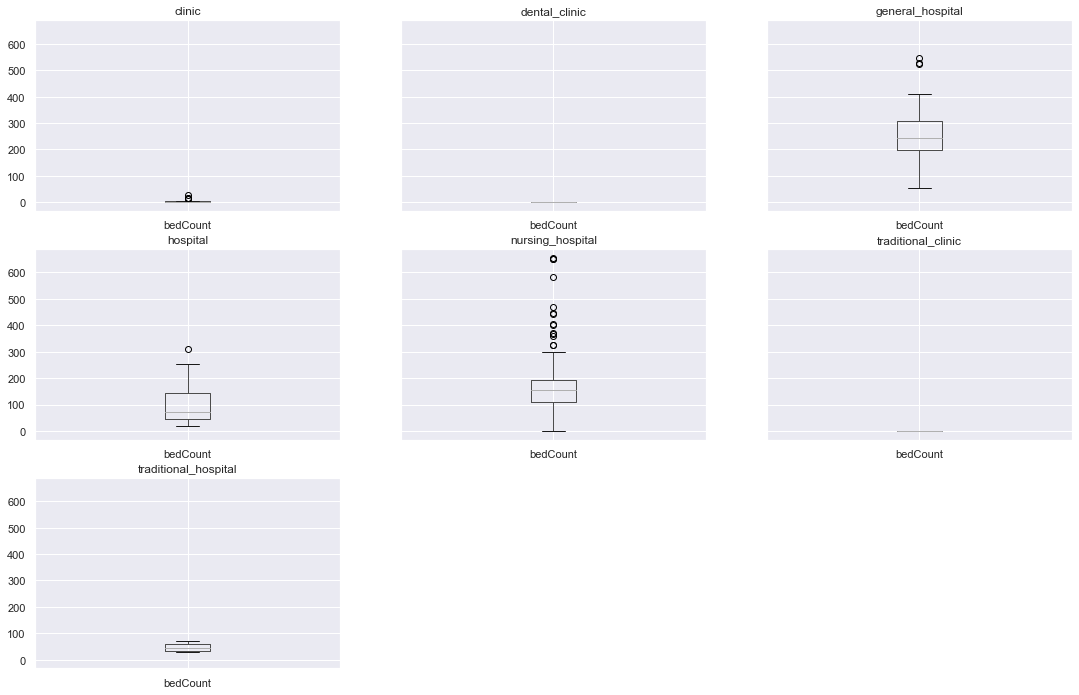

In [319]:
boxplot = tr.groupby(["instkind"]).boxplot(column=['bedCount'], figsize=(18,12))

In [320]:
# 위 박스플롯을 보시면 아시겠지만, nursing_h, general_h 가 count도 많고 outlier도 많습니다.
# 결측치는 일단 그룹별 평균으로 채워넣어보겠습니다.

tr.groupby(["instkind"])["bedCount"].mean()

instkind
clinic                    4.444444
dental_clinic             0.000000
general_hospital        261.567568
hospital                 96.220930
nursing_hospital        172.340278
traditional_clinic        0.000000
traditional_hospital     46.666667
Name: bedCount, dtype: float64

In [321]:
te.groupby(["instkind"])["bedCount"].mean()

instkind
clinic                   12.000000
general_hospital        292.210526
hospital                102.794118
nursing_hospital        187.983607
traditional_clinic        0.000000
traditional_hospital           NaN
Name: bedCount, dtype: float64

In [322]:
tr['bedCount'] = tr['bedCount'].fillna(tr.groupby('instkind')['bedCount'].transform('mean'))

In [323]:
te['bedCount'] = te['bedCount'].fillna(te.groupby('instkind')['bedCount'].transform('mean'))

In [324]:
tr[["instkind", "bedCount"]]

,instkind,bedCount
0,nursing_hospital,175.000000
1,general_hospital,410.000000
2,nursing_hospital,468.000000
3,general_hospital,353.000000
4,general_hospital,196.000000
...,...,...
296,nursing_hospital,214.000000
297,hospital,96.220930
298,hospital,96.220930
299,nursing_hospital,180.000000


In [325]:
tr[tr['bedCount'].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month


In [326]:
te[te['bedCount'].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
123,425,NaN,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.0,1.760117e+10,...,0.0,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132,137,same,2001,05


In [327]:
te.loc[te["inst_id"] == 425, "bedCount"] = "46.6"

In [328]:
te[te['bedCount'].isnull()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month


## 1.7 employee1,2 칼럼 정리

tr의 employee는 float, te의 employee는 object
 - te는 ,를 포함한 object로 되어 있습니다. 이걸 제거하고 평균으로 채우겠습니다.

In [329]:
# 먼저 형변환 하고,
te = te.astype({"employee1": str, "employee2": str})

# , 없애줄게요.
te['employee1'] = te['employee1'].apply(lambda x: x.replace(',', ''))
te['employee2'] = te['employee2'].apply(lambda x: x.replace(',', ''))

# 다시 float으로 바꿔줍니다.
te = te.astype({"employee1": float, "employee2": float})

In [330]:
te.groupby(["instkind"])["employee1"].mean() # 이제 평균이 구해지네요.

instkind
clinic                  215.000000
general_hospital        604.157895
hospital                148.093750
nursing_hospital         98.426230
traditional_clinic      546.000000
traditional_hospital    132.000000
Name: employee1, dtype: float64

In [331]:
# 각 그룹별 평균으로 채워줍니다.

te['employee1'] = te['employee1'].fillna(te.groupby('instkind')['employee1'].transform('mean'))
te['employee2'] = te['employee2'].fillna(te.groupby('instkind')['employee2'].transform('mean'))

# tr도 마찬가지로 채워줍니다.

tr['employee1'] = tr['employee1'].fillna(tr.groupby('instkind')['employee1'].transform('mean'))
tr['employee2'] = tr['employee2'].fillna(tr.groupby('instkind')['employee2'].transform('mean'))

In [332]:
te.tail() # 짜잔!

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
122,424,NaN,jeonnam,33,20011012.0,0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,0.0,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560.00000,409.000000,NaN,2001,10
123,425,NaN,gyeonggi,74,20010530.0,46.6,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,0.0,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132.00000,137.000000,same,2001,05
124,429,NaN,gyeonggi,116,20010101.0,150,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,148.09375,140.566667,NaN,2001,01
125,430,NaN,jeju,76,20010201.0,292.211,general_hospital,4.892710e+10,4.157148e+10,4.721485e+09,...,0.0,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363.00000,343.000000,same,2001,02
126,431,NaN,choongbuk,163,19961216.0,96,hospital,1.092444e+10,1.168731e+09,8.709839e+09,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,148.09375,140.566667,NaN,1996,12


In [333]:
tr.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
296,422,1,jeonnam,178,20050211,214.000000,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.000000,141.000000,same,2005,02
297,423,0,choongnam,159,20140618,96.220930,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.000000,79.000000,same,2014,06
298,426,0,gyeongbuk,107,19830705,96.220930,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,125.488095,116.011905,NaN,1983,07
299,427,0,gyeonggi,169,20070101,180.000000,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,93.185714,NaN,2007,01
300,428,1,seoul,79,20011017,46.666667,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.000000,15.000000,same,2001,10


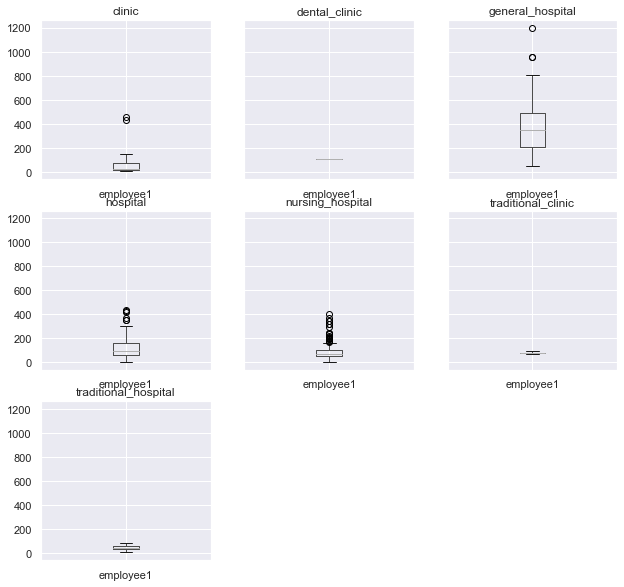

In [334]:
boxplot = tr.groupby(["instkind"]).boxplot(column=['employee1'], figsize=(10,10))

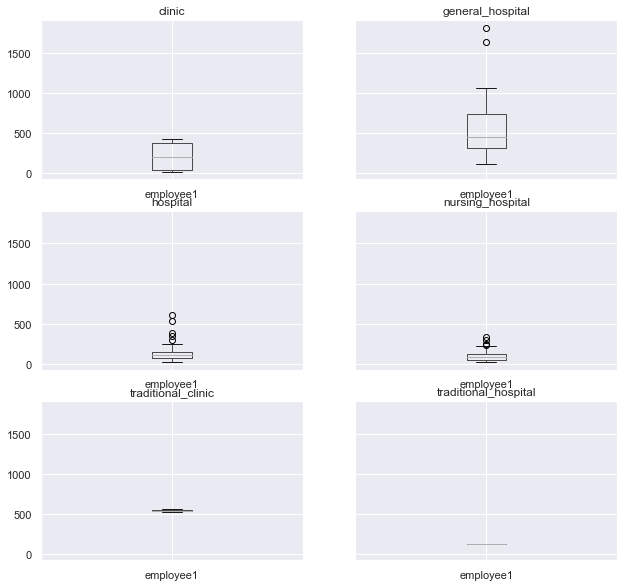

In [335]:
boxplot = te.groupby(["instkind"]).boxplot(column=['employee1'], figsize=(10,10))

## 1.8 ownerChange 칼럼 정리

일단 빈도가 높은 same으로 채워보겠습니다. 나중에 추가로 성적을 올리고 싶으면 분석을 통해 넣어보죠.

In [336]:
tr["ownerChange"].value_counts(), te["ownerChange"].value_counts()

(same      247
 change     42
 Name: ownerChange, dtype: int64,
 same      101
 change     11
 Name: ownerChange, dtype: int64)

In [337]:
def owner_change(df):
    df["ownerChange"].fillna(value="same", inplace=True)
    df["ownerChange"].replace({"same":0,
                          "change":1}, inplace=True)

In [338]:
owner_change(tr)
owner_change(te)

In [339]:
tr["ownerChange"].value_counts(), te["ownerChange"].value_counts()

(0    259
 1     42
 Name: ownerChange, dtype: int64,
 0    116
 1     11
 Name: ownerChange, dtype: int64)

In [340]:
tr["ownerChange"].value_counts()

0    259
1     42
Name: ownerChange, dtype: int64

In [341]:
tr.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
296,422,1,jeonnam,178,20050211,214.000000,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.000000,141.000000,0,2005,02
297,423,0,choongnam,159,20140618,96.220930,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.000000,79.000000,0,2014,06
298,426,0,gyeongbuk,107,19830705,96.220930,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,125.488095,116.011905,0,1983,07
299,427,0,gyeonggi,169,20070101,180.000000,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,93.185714,0,2007,01
300,428,1,seoul,79,20011017,46.666667,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.000000,15.000000,0,2001,10


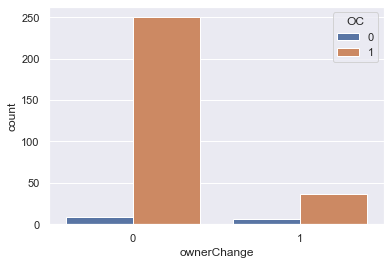

In [342]:
sns.countplot(data=tr, x="ownerChange", hue="OC")
plt.show()
# 역시나 주인이 바뀐 곳이 폐점 할 확률이 높군요.

## 1.9 회계 데이터 정리

### 1.9.1 결측치 처리

회계 데이터는 칼럼이 매우 많습니다. 그룹별로 결측치를 채워주기 위해서 for문을 돌리겠습니다.

In [343]:
def fill_the_missing(df):
    columns = df.columns[7:55].tolist()
    
    for i in range(len(columns)):
        df[columns[i]] = df[columns[i]].fillna(df.groupby('instkind')[columns[i]].transform('mean'))

    for i in range(len(columns)):
        df[columns[i]] = df[columns[i]].apply(lambda x: x+1)

In [344]:
fill_the_missing(tr)
fill_the_missing(te)

### 1.9.2 변수간 상관관계 분석

In [345]:
tr.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange', 'open_year', 'open_month'],
      dtype='object')

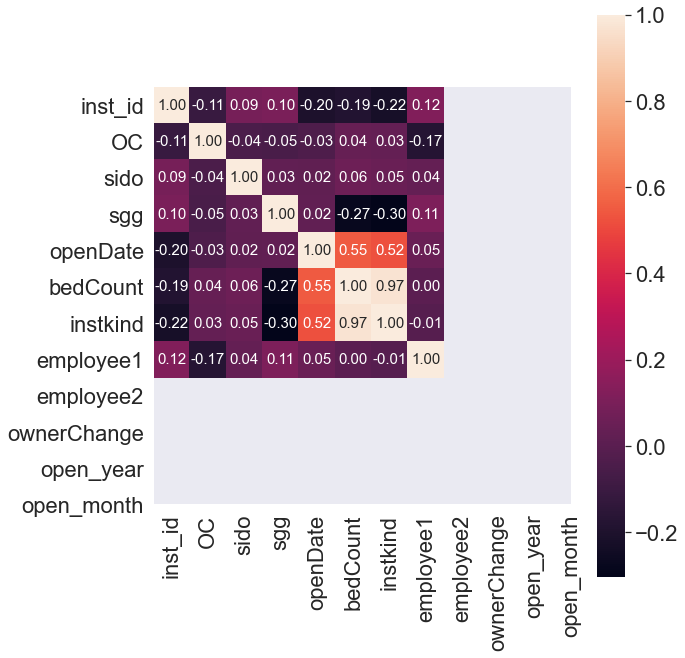

In [346]:
# feature 들의 상관 관계 분석하기

show_cols = ['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
             'employee1', 'employee2', 'ownerChange', 'open_year', 'open_month']

corr= tr[show_cols].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=2.0)

figure(figsize=(10,10))
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)

plt.tight_layout()
plt.show()

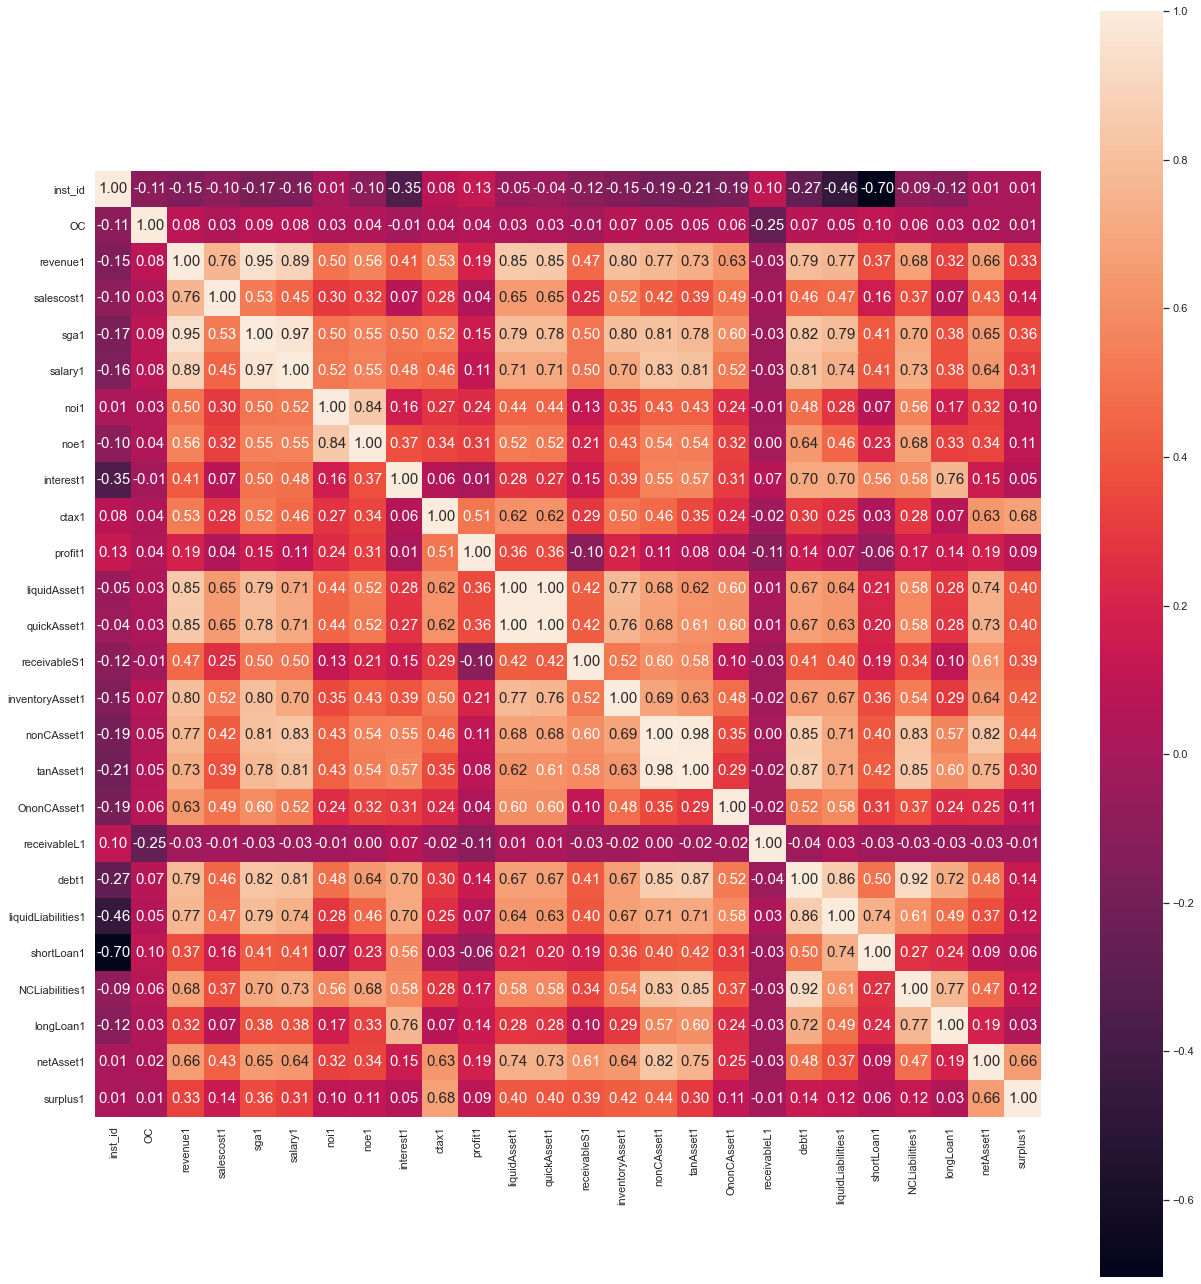

In [347]:
# feature 들의 상관 관계 분석하기

show_cols = ['inst_id', 'OC', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1']

corr= tr[show_cols].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.0)

figure(figsize=(18,18))
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)

plt.tight_layout()
plt.show()

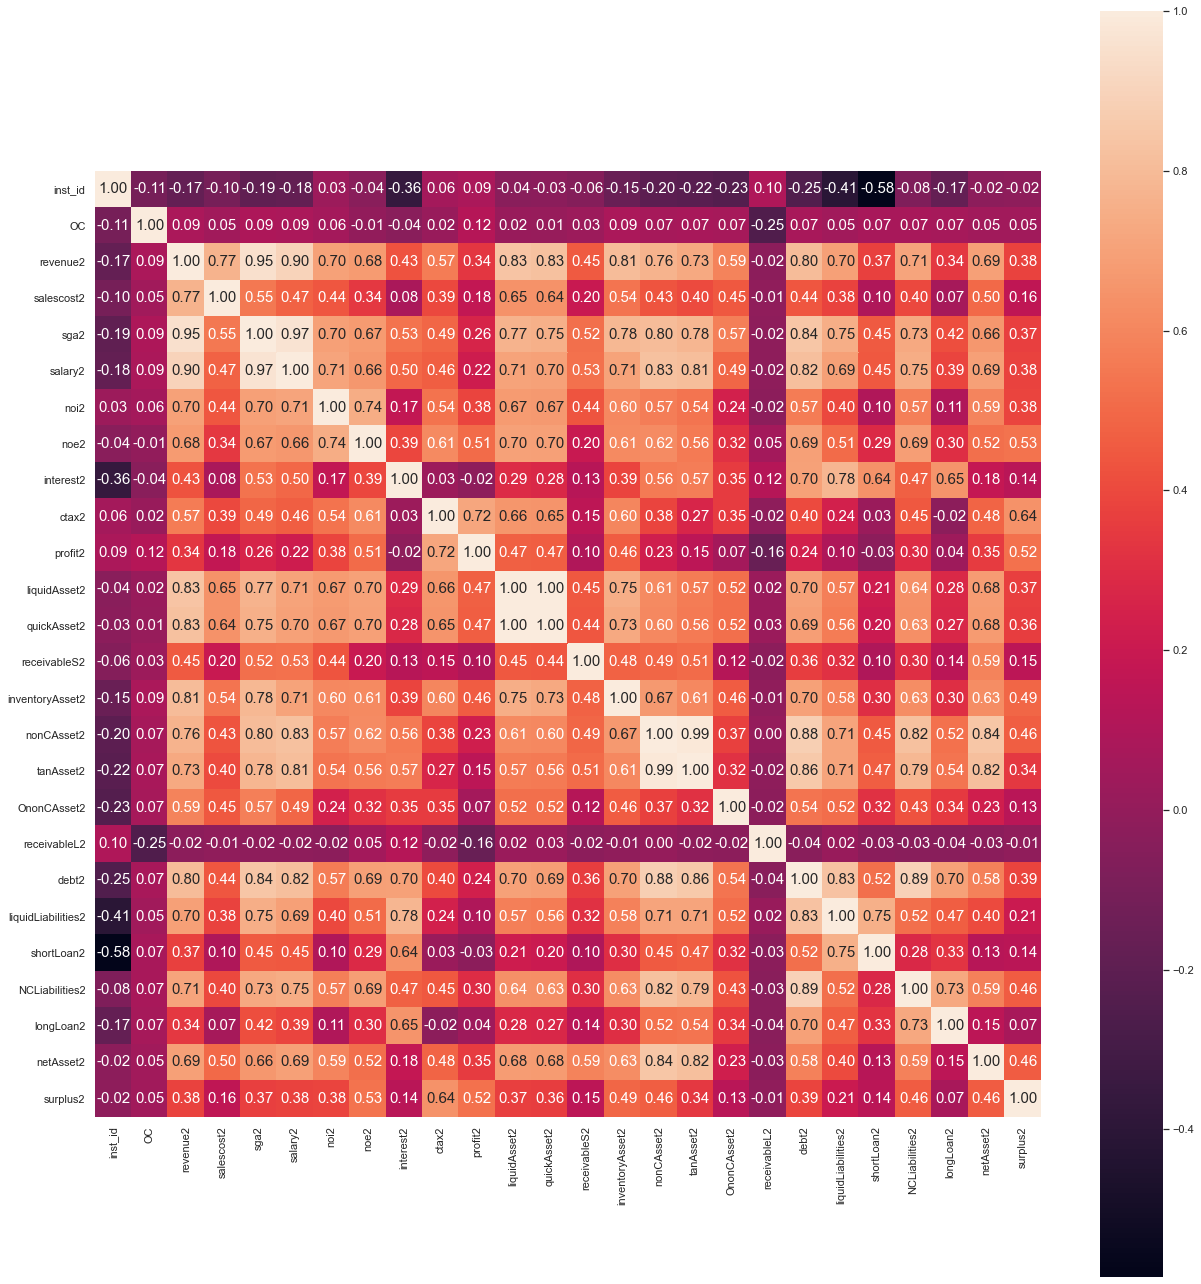

In [348]:
# feature 들의 상관 관계 분석하기

show_cols = ['inst_id', 'OC', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']

corr= tr[show_cols].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.0)

figure(figsize=(18,18))
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)

plt.tight_layout()
plt.show()

## 1.99 중간 저장을 해줍니다.

In [349]:
tr.to_csv(r"C:\Users\Wyatt\wyatt37\Comp\hospital\submission\preprocessed_tr_201230.csv", index=False)
te.to_csv(r"C:\Users\Wyatt\wyatt37\Comp\hospital\submission\preprocessed_te_201230.csv", index=False)

In [390]:
tr = pd.read_csv(r"C:\Users\Wyatt\wyatt37\Comp\hospital\submission\preprocessed_tr_201230.csv")
te = pd.read_csv(r"C:\Users\Wyatt\wyatt37\Comp\hospital\submission\preprocessed_te_201230.csv")

# 2. 변수 생성

In [391]:
tr.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,open_year,open_month
0,1,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,1.000000e+00,3.961135e+09,...,1.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,0,2007,12
1,3,1,gyeongnam,32,19970401,410.0,general_hospital,4.170918e+10,6.750030e+09,3.398514e+10,...,4.876339e+09,1.310873e+10,6.603691e+09,1.432061e+10,2.928745e+09,801.0,813.0,0,1997,4
2,4,1,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,234.0,1.0,0,2016,12
3,7,1,incheon,141,20000814,353.0,general_hospital,7.250734e+10,1.000000e+00,7.067740e+10,...,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,0,2000,8
4,9,1,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,1.000000e+00,4.765605e+10,...,1.759375e+10,2.136001e+10,1.410803e+10,5.561942e+06,9.025550e+09,206.0,197.0,0,2005,9


#### 만들어야 할 변수를 다시 정리해봅시다.
1. revenue_yoy = revenue1 - revenue2 (16-17 매출증가 분석)
2. liquidLiabilities_yoy = liquidLiabilities1 - liquidLiabilities2 (16-17 유동부채증가 분석)
3. liquidL_ratio1 = liquidLiabilities1/debt1  (부채총계 대비 유동부채 비율 분석)


4. salary_mean1 = (salary1/employee1) 직원당 평균 급여 분석
5. profit_ratio1 = (revenue1 - salescost1)/revenue1 (영업이익률 분석)
6. net_income1 = Profit1/(revenue1 - salescost1) 영업이익률 대비 순익률 분석
    
    
7. lA_ratio1 = liquidAsset1 / (liquidAsset1 + nonCAsset1) 총자산 대비 유동자산 비율 분석
8. lAL_PM = liquidAsset1 - liquidLiabilities1

In [392]:
# 함수 만들어서 돌릴게요.

def make_features(tr):
    # 1. 17, 16 매출증가율 YoY
    tr["revenue_yoy"] = tr["revenue1"] / tr["revenue2"]
    
    # 17, 16 유동부채증가율 yoy
    tr["liquidL_yoy"] = tr["liquidLiabilities1"] / tr["liquidLiabilities2"]
    
    # 부채 총계 대비 유동부채 비율
    tr["liquidL_ratio1"] = tr["liquidLiabilities1"] - tr["debt1"]
    tr["liquidL_ratio2"] = tr["liquidLiabilities2"] - tr["debt2"]

    # 유동부채증감 yoy
    tr["liquidL_yoy"] = tr["liquidL_ratio1"] - tr["liquidL_ratio2"] # inf 지우기 위해 나누지 않고 빼줄게요.
    
    # 직원당 평균 급여
    tr["salary_mean1"] = tr["salary1"] - tr["employee1"]
    tr["salary_mean2"] = tr["salary2"] - tr["employee2"]
    
    # 영업이익률
    tr["profit_ratio1"] = (tr["revenue1"] - tr["salescost1"]) / tr["revenue1"]
    tr["profit_ratio2"] = (tr["revenue2"] - tr["salescost2"]) / tr["revenue2"]

    # 영업이익증감 yoy
    tr["profitRatio_yoy"] = tr["profit_ratio1"] - tr["profit_ratio2"] # inf 막기 위해 나누지 않고 빼줄게요.
    
    # 순익률 - > 매출대비 당기순이익 비율
    tr["netincome_ratio1"] = tr["profit1"] / tr["revenue1"] # inf 나와서 수정합니다.
    tr["netincome_ratio2"] = tr["profit2"] / tr["revenue2"]

    # 영업이익률 yoy
    tr["netincomeRatio_yoy"] = tr["netincome_ratio1"] - tr["netincome_ratio2"] # inf 막기 위해 빼줍니다.
    
    # 유동자산 비율
    tr["liquidA_ratio1"] = tr["liquidAsset1"] / (tr["liquidAsset1"] + tr["nonCAsset1"])
    tr["liquidA_ratio2"] = tr["liquidAsset2"] / (tr["liquidAsset2"] + tr["nonCAsset2"])
    # 유동자산비율 yoy
    tr["liquidARatio_yoy"] = tr["liquidA_ratio1"] - tr["liquidA_ratio2"]
    
    # 유동자산 손익 여부
    tr["liquidAL_PM1"] = tr["liquidAsset1"] - tr["liquidLiabilities1"]
    tr["liquidAL_PM2"] = tr["liquidAsset2"] - tr["liquidLiabilities2"]

    return tr

In [393]:
tr= make_features(tr)
te= make_features(te)

In [394]:
tr

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,profit_ratio2,profitRatio_yoy,netincome_ratio1,netincome_ratio2,netincomeRatio_yoy,liquidA_ratio1,liquidA_ratio2,liquidARatio_yoy,liquidAL_PM1,liquidAL_PM2
0,1,1,choongnam,73,20071228,175.000000,nursing_hospital,4.217530e+09,1.000000e+00,3.961135e+09,...,1.000000,-4.431011e-12,5.338899e-02,0.048357,5.032310e-03,0.287104,0.245737,0.041367,8.113760e+08,6.072926e+08
1,3,1,gyeongnam,32,19970401,410.000000,general_hospital,4.170918e+10,6.750030e+09,3.398514e+10,...,0.829709,8.455852e-03,5.230417e-03,0.010173,-4.942618e-03,0.231855,0.236152,-0.004297,-4.078302e+09,-3.778706e+09
2,4,1,gyeonggi,89,20161228,468.000000,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000,4.868368e-01,4.167630e-02,1.000000,-9.583237e-01,0.693373,0.500000,0.193373,1.800278e+08,0.000000e+00
3,7,1,incheon,141,20000814,353.000000,general_hospital,7.250734e+10,1.000000e+00,7.067740e+10,...,1.000000,1.165290e-12,1.245157e-02,0.012540,-8.818902e-05,0.231970,0.219402,0.012568,-1.495034e+10,-5.892876e+09
4,9,1,gyeongnam,32,20050901,196.000000,general_hospital,4.904354e+10,1.000000e+00,4.765605e+10,...,1.000000,4.074519e-13,1.646490e-03,0.000679,9.676073e-04,0.126381,0.095392,0.030989,-2.259210e+10,-2.516581e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,jeonnam,178,20050211,214.000000,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,0.942595,2.859508e-03,7.805785e-02,-0.037123,1.151808e-01,0.189023,0.172297,0.016726,1.256599e+09,-6.763957e+07
297,423,0,choongnam,159,20140618,96.220930,hospital,6.717144e+09,8.200000e+09,1.000000e+00,...,0.000000,-2.207569e-01,-2.415492e-01,1.000000,-1.241549e+00,0.500000,0.500000,0.000000,0.000000e+00,0.000000e+00
298,426,0,gyeongbuk,107,19830705,96.220930,hospital,1.000000e+00,1.000000e+00,5.479428e+07,...,0.051403,-5.140303e-02,-7.175308e+07,-0.048473,-7.175308e+07,0.409801,0.423150,-0.013349,1.816897e+09,1.903650e+09
299,427,0,gyeonggi,169,20070101,180.000000,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,0.881324,-8.007729e-03,-8.741845e-01,-0.666283,-2.079017e-01,0.291755,0.329897,-0.038143,-2.577691e+09,-5.039529e+08


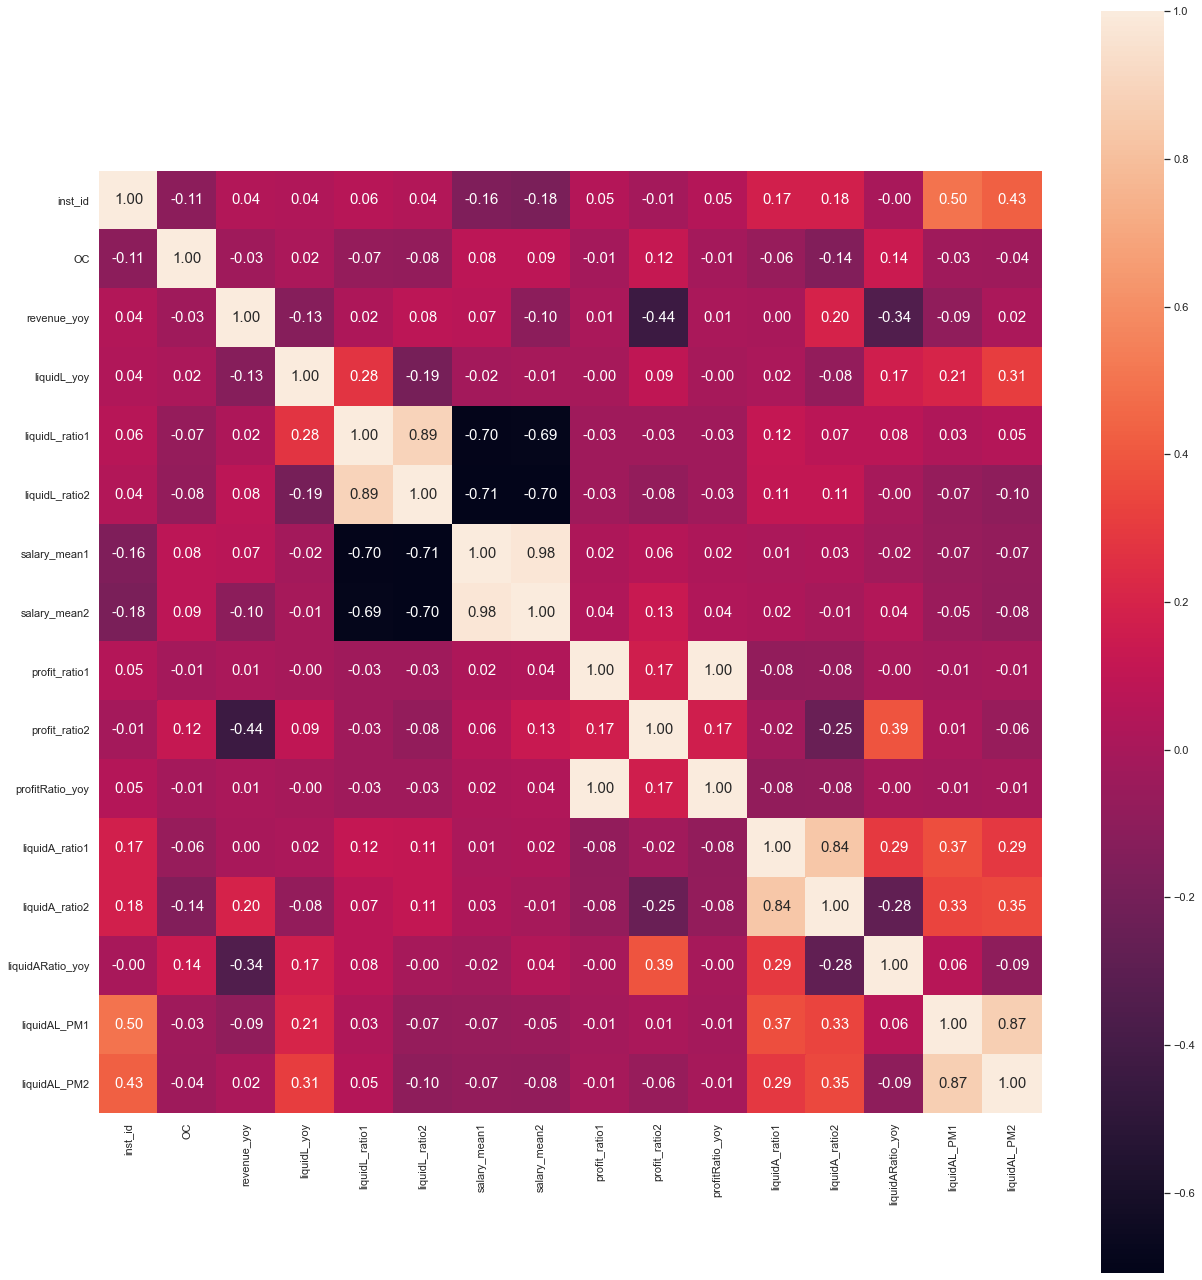

In [395]:
# feature 들의 상관 관계 분석하기

show_cols = ['inst_id', 'OC', 'revenue_yoy', 'liquidL_yoy',
       'liquidL_ratio1', 'liquidL_ratio2', 'salary_mean1', 'salary_mean2',
       'profit_ratio1', 'profit_ratio2', 'profitRatio_yoy', 'liquidA_ratio1',
       'liquidA_ratio2', 'liquidARatio_yoy', 'liquidAL_PM1', 'liquidAL_PM2']

corr= tr[show_cols].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.0)

figure(figsize=(18,18))
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)

plt.tight_layout()
plt.show()

# 3. 모델 선택

전처리 된 기본 데이터를 각각의 모델에 돌려보고 각각의 성능을 파악해보겠습니다.

## 3.1 피쳐 드랍

분석에 필요가 없어보이는 데이터는 일단 drop 하겠습니다.
 - sgg 지웁니다.
 - opendate 지웁니다.

In [396]:
# 나중에 쓸 inst_id 를 먼저 받아줍니다.

inst_id = te.inst_id

In [397]:
tr.drop(["inst_id", "sgg","openDate"], axis=1, inplace=True)
te.drop(["inst_id", "sgg","openDate"], axis=1, inplace=True)

## 3.2 피쳐 인코딩

범주형 변수들을 인코딩해주겠습니다.
- 문제는 sido, instkind, open_year, open_month 들 다 원핫으로 바꾸면 60개가 넘습니다.
- 라벨인코딩 -> 카테고리컬 방식을 사용할 것입니다.
- 다만 오버샘플링에서 smote가 category타입을 복제하지 못하기 때문에 형변환은 리샘플링 후에 적용하겠습니다.

In [398]:
le = preprocessing.LabelEncoder()

In [399]:
le_columns = ["sido", "instkind", "open_year", "open_month"]

In [400]:
for col in le_columns:
    tr[col] = le.fit_transform(tr[col])
    te[col] = le.fit_transform(te[col])

## 3.3 데이터셋 분리

In [401]:
x_train = tr.loc[:, tr.columns != 'OC']
y_train = tr.loc[:, ['OC']]

In [402]:
x_test = te.loc[:, te.columns != 'OC']
y_test = te.loc[:, ['OC']]

In [403]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((301, 73), (301, 1), (127, 73), (127, 1))

## 3.4 오버샘플링

SMOTE 기법을 활용하며, 적용후에 형변환을 해주어야 합니다.

In [404]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train.OC==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train.OC==1)))

Before OverSampling, counts of label '0': 15
Before OverSampling, counts of label '1': 286


In [405]:
sm = BorderlineSMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res.OC==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res.OC==0)))

After OverSampling, the shape of train_X: (572, 73)
After OverSampling, the shape of train_y: (572, 1) 

After OverSampling, counts of label '1': 286
After OverSampling, counts of label '0': 286


In [406]:
# 순서형 범주가 아니기 때문에 category 로 형변환 해주어야 합니다.
le_columns = ["sido", "instkind", "open_year", "open_month"]

#for col in le_columns:
#    tr_scaled[col] = tr_scaled[col].astype('category')
#    te_scaled[col] = te_scaled[col].astype('category')
    
for col in le_columns:
    x_train_res[col] = x_train_res[col].astype('category')
    x_test_res[col] = x_test_res[col].astype('category')

In [407]:
x_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sido                572 non-null    category
 1   bedCount            572 non-null    float64 
 2   instkind            572 non-null    category
 3   revenue1            572 non-null    float64 
 4   salescost1          572 non-null    float64 
 5   sga1                572 non-null    float64 
 6   salary1             572 non-null    float64 
 7   noi1                572 non-null    float64 
 8   noe1                572 non-null    float64 
 9   interest1           572 non-null    float64 
 10  ctax1               572 non-null    float64 
 11  profit1             572 non-null    float64 
 12  liquidAsset1        572 non-null    float64 
 13  quickAsset1         572 non-null    float64 
 14  receivableS1        572 non-null    float64 
 15  inventoryAsset1     572 non-null    floa

## 3.5 모델링

앙상블 모델을 통해서 최종 결과물을 뽑아보겠습니다. 후보는 다음과 같습니다.

- LR
- RF
- lgbm
- catb
- xgb
- svm

입니다.

In [386]:
x_train = x_train_res.copy()
y_train = y_train_res.copy()

In [458]:
lr = linear_model.LogisticRegression(random_state=42, multi_class="ovr")
model_lr = lr.fit(x_train, y_train)
lr_pred = model_lr.predict_proba(x_test)[:, 1]

sub_lr = pd.DataFrame({'inst_id' : inst_id , 'OC' : lr_pred })
sub_lr = sub_lr[['inst_id', 'OC']]

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [459]:
model_rf = RandomForestClassifier(random_state=42,
                                  max_features=5,
                                  n_estimators=100)

model_rf.fit(x_train, y_train)
rf_pred = model_rf.predict_proba(x_test)[:, 1]

sub_rf = pd.DataFrame({'inst_id' : inst_id , 'OC' : rf_pred })
sub_rf = sub_rf[['inst_id', 'OC']]

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [460]:
categorical_features = ["sido", "instkind", "open_year", "open_month"]
train_data = lgb.Dataset(x_train, label=y_train,
                              categorical_feature=categorical_features)
test_data = lgb.Dataset(x_test, label=y_test)


model_lgbm = lgb.LGBMClassifier(random_state=42,
                               num_leaves=5,
                                max_depth=4,
                               max_bin=5)
model_lgbm.fit(x_train, y_train)
lgbm_pred = model_lgbm.predict_proba(x_test)[:, 1]

sub_lgbm = pd.DataFrame({'inst_id' : inst_id , 'OC' : lgbm_pred })
sub_lgbm = sub_lgbm[['inst_id', 'OC']]

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [461]:
dtrain_prod = xgb.DMatrix(data = x_train, label = y_train)
dtest_prod = xgb.DMatrix(data = x_test)

param = {'objective' : 'binary:logistic',
         'max_depth' : 6,
         'max_features':5,
         'eta': 0.3,
         'colsample_bytree' : 1,
         'subsample' : 1,
         'silent' : 0
         }

xgb_model = xgb.train(param, 
                      dtrain_prod, 
                      num_boost_round = 2
                      )

XGB_prediction = xgb_model.predict(dtest_prod)

sub_XGB= pd.DataFrame({'inst_id' : inst_id , 'OC' : XGB_prediction })
sub_XGB= sub_XGB[['inst_id', 'OC']]

[13:39:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [463]:
model_catb = catb.CatBoostClassifier(random_state=42, 
                                    l2_leaf_reg=0.01)
model_catb.fit(x_train, y_train)
catb_pred = model_catb.predict_proba(x_test)[:, 1]

sub_catb = pd.DataFrame({'inst_id' : inst_id , 'OC' : catb_pred })
sub_catb = sub_catb[['inst_id', 'OC']]

0:	learn: 0.6329597	total: 4.38ms	remaining: 4.38s
1:	learn: 0.5852048	total: 7.25ms	remaining: 3.62s
2:	learn: 0.5354774	total: 10ms	remaining: 3.33s
3:	learn: 0.4880239	total: 12.8ms	remaining: 3.19s
4:	learn: 0.4459616	total: 16ms	remaining: 3.18s
5:	learn: 0.4064460	total: 18.8ms	remaining: 3.11s
6:	learn: 0.3731446	total: 21.6ms	remaining: 3.06s
7:	learn: 0.3505795	total: 24.2ms	remaining: 3s
8:	learn: 0.3175646	total: 26.9ms	remaining: 2.97s
9:	learn: 0.2877942	total: 29.9ms	remaining: 2.96s
10:	learn: 0.2668077	total: 32.8ms	remaining: 2.95s
11:	learn: 0.2466651	total: 35.8ms	remaining: 2.95s
12:	learn: 0.2346930	total: 38.7ms	remaining: 2.94s
13:	learn: 0.2198580	total: 41.5ms	remaining: 2.92s
14:	learn: 0.2089559	total: 44.3ms	remaining: 2.91s
15:	learn: 0.1922405	total: 47.1ms	remaining: 2.89s
16:	learn: 0.1792802	total: 49.9ms	remaining: 2.88s
17:	learn: 0.1710504	total: 52.8ms	remaining: 2.88s
18:	learn: 0.1623149	total: 55.5ms	remaining: 2.87s
19:	learn: 0.1551161	total: 5

186:	learn: 0.0006713	total: 537ms	remaining: 2.33s
187:	learn: 0.0006623	total: 540ms	remaining: 2.33s
188:	learn: 0.0006470	total: 543ms	remaining: 2.33s
189:	learn: 0.0006405	total: 545ms	remaining: 2.32s
190:	learn: 0.0006316	total: 548ms	remaining: 2.32s
191:	learn: 0.0006184	total: 551ms	remaining: 2.32s
192:	learn: 0.0006117	total: 554ms	remaining: 2.31s
193:	learn: 0.0006117	total: 556ms	remaining: 2.31s
194:	learn: 0.0006117	total: 559ms	remaining: 2.31s
195:	learn: 0.0005934	total: 563ms	remaining: 2.31s
196:	learn: 0.0005813	total: 565ms	remaining: 2.3s
197:	learn: 0.0005813	total: 568ms	remaining: 2.3s
198:	learn: 0.0005720	total: 571ms	remaining: 2.3s
199:	learn: 0.0005720	total: 574ms	remaining: 2.29s
200:	learn: 0.0005554	total: 577ms	remaining: 2.29s
201:	learn: 0.0005409	total: 579ms	remaining: 2.29s
202:	learn: 0.0005409	total: 582ms	remaining: 2.29s
203:	learn: 0.0005313	total: 585ms	remaining: 2.28s
204:	learn: 0.0005313	total: 588ms	remaining: 2.28s
205:	learn: 0.0

376:	learn: 0.0002783	total: 1.08s	remaining: 1.79s
377:	learn: 0.0002783	total: 1.09s	remaining: 1.79s
378:	learn: 0.0002783	total: 1.09s	remaining: 1.79s
379:	learn: 0.0002783	total: 1.09s	remaining: 1.78s
380:	learn: 0.0002783	total: 1.09s	remaining: 1.78s
381:	learn: 0.0002783	total: 1.1s	remaining: 1.78s
382:	learn: 0.0002783	total: 1.1s	remaining: 1.77s
383:	learn: 0.0002783	total: 1.1s	remaining: 1.77s
384:	learn: 0.0002783	total: 1.11s	remaining: 1.77s
385:	learn: 0.0002783	total: 1.11s	remaining: 1.76s
386:	learn: 0.0002783	total: 1.11s	remaining: 1.76s
387:	learn: 0.0002768	total: 1.11s	remaining: 1.76s
388:	learn: 0.0002768	total: 1.12s	remaining: 1.75s
389:	learn: 0.0002768	total: 1.12s	remaining: 1.75s
390:	learn: 0.0002767	total: 1.12s	remaining: 1.75s
391:	learn: 0.0002752	total: 1.13s	remaining: 1.75s
392:	learn: 0.0002752	total: 1.13s	remaining: 1.74s
393:	learn: 0.0002752	total: 1.13s	remaining: 1.74s
394:	learn: 0.0002752	total: 1.13s	remaining: 1.74s
395:	learn: 0.0

559:	learn: 0.0002507	total: 1.6s	remaining: 1.26s
560:	learn: 0.0002507	total: 1.6s	remaining: 1.25s
561:	learn: 0.0002467	total: 1.61s	remaining: 1.25s
562:	learn: 0.0002467	total: 1.61s	remaining: 1.25s
563:	learn: 0.0002467	total: 1.61s	remaining: 1.25s
564:	learn: 0.0002467	total: 1.61s	remaining: 1.24s
565:	learn: 0.0002467	total: 1.62s	remaining: 1.24s
566:	learn: 0.0002467	total: 1.62s	remaining: 1.24s
567:	learn: 0.0002467	total: 1.62s	remaining: 1.24s
568:	learn: 0.0002467	total: 1.63s	remaining: 1.23s
569:	learn: 0.0002467	total: 1.63s	remaining: 1.23s
570:	learn: 0.0002467	total: 1.63s	remaining: 1.23s
571:	learn: 0.0002467	total: 1.64s	remaining: 1.22s
572:	learn: 0.0002467	total: 1.64s	remaining: 1.22s
573:	learn: 0.0002467	total: 1.64s	remaining: 1.22s
574:	learn: 0.0002467	total: 1.64s	remaining: 1.21s
575:	learn: 0.0002467	total: 1.65s	remaining: 1.21s
576:	learn: 0.0002467	total: 1.65s	remaining: 1.21s
577:	learn: 0.0002467	total: 1.65s	remaining: 1.21s
578:	learn: 0.

747:	learn: 0.0002407	total: 2.13s	remaining: 719ms
748:	learn: 0.0002407	total: 2.14s	remaining: 716ms
749:	learn: 0.0002407	total: 2.14s	remaining: 713ms
750:	learn: 0.0002407	total: 2.14s	remaining: 710ms
751:	learn: 0.0002407	total: 2.15s	remaining: 707ms
752:	learn: 0.0002407	total: 2.15s	remaining: 705ms
753:	learn: 0.0002407	total: 2.15s	remaining: 702ms
754:	learn: 0.0002407	total: 2.15s	remaining: 699ms
755:	learn: 0.0002407	total: 2.16s	remaining: 696ms
756:	learn: 0.0002407	total: 2.16s	remaining: 693ms
757:	learn: 0.0002407	total: 2.16s	remaining: 690ms
758:	learn: 0.0002407	total: 2.17s	remaining: 687ms
759:	learn: 0.0002407	total: 2.17s	remaining: 685ms
760:	learn: 0.0002407	total: 2.17s	remaining: 682ms
761:	learn: 0.0002407	total: 2.17s	remaining: 679ms
762:	learn: 0.0002407	total: 2.19s	remaining: 679ms
763:	learn: 0.0002407	total: 2.19s	remaining: 677ms
764:	learn: 0.0002407	total: 2.19s	remaining: 674ms
765:	learn: 0.0002407	total: 2.2s	remaining: 671ms
766:	learn: 0

921:	learn: 0.0002405	total: 2.66s	remaining: 225ms
922:	learn: 0.0002405	total: 2.66s	remaining: 222ms
923:	learn: 0.0002405	total: 2.67s	remaining: 219ms
924:	learn: 0.0002405	total: 2.67s	remaining: 216ms
925:	learn: 0.0002405	total: 2.67s	remaining: 213ms
926:	learn: 0.0002405	total: 2.67s	remaining: 211ms
927:	learn: 0.0002405	total: 2.68s	remaining: 208ms
928:	learn: 0.0002405	total: 2.68s	remaining: 205ms
929:	learn: 0.0002405	total: 2.68s	remaining: 202ms
930:	learn: 0.0002405	total: 2.69s	remaining: 199ms
931:	learn: 0.0002405	total: 2.69s	remaining: 196ms
932:	learn: 0.0002405	total: 2.69s	remaining: 193ms
933:	learn: 0.0002405	total: 2.69s	remaining: 190ms
934:	learn: 0.0002405	total: 2.7s	remaining: 188ms
935:	learn: 0.0002405	total: 2.7s	remaining: 185ms
936:	learn: 0.0002405	total: 2.7s	remaining: 182ms
937:	learn: 0.0002405	total: 2.71s	remaining: 179ms
938:	learn: 0.0002405	total: 2.71s	remaining: 176ms
939:	learn: 0.0002405	total: 2.71s	remaining: 173ms
940:	learn: 0.0

In [464]:
model_svc = svm.SVC(kernel="rbf", random_state=42, probability=True)
model_svc.fit(x_train, y_train)

svc_pred = model_svc.predict_proba(x_test)[:, 1]

sub_svc = pd.DataFrame({'inst_id' : inst_id , 'OC' : svc_pred })
sub_svc = sub_svc[['inst_id', 'OC']]

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [485]:
#Forming the ensemble dataset of the 3 models
ensemble = pd.DataFrame()
ensemble['inst_id'] = sub_XGB['inst_id']
ensemble['XGB'] = sub_XGB['OC']
ensemble['LR'] = sub_lr['OC']
ensemble['RF'] = sub_rf['OC']
ensemble['LGBM'] = sub_lgbm['OC']
ensemble['CATB'] = sub_catb['OC']
ensemble['SVC'] = sub_svc['OC']

# Taking the average of all 6 models
ensemble['ens'] = ((ensemble['XGB']
                   + ensemble['LR']
                   + ensemble['RF']
                   + ensemble['LGBM']
                   + ensemble['CATB']
                   + ensemble['SVC'])
                   /6)
threshold = 0.85

ensemble['OC'] = round(ensemble['ens'] - threshold + 0.5)
#0.7 as the threshold and above that the hospital is closed.

#Printing to see all the hospitals that are classified as closed 
print(ensemble.loc[ensemble['OC'] == 0, ])

ensemble = ensemble.loc[:, ['inst_id', 'OC']]



     inst_id       XGB            LR    RF      LGBM      CATB       SVC  \
1          5  0.609126  8.587119e-04  0.95  0.999930  0.999922  0.939417   
8         21  0.733626  3.398877e-03  0.73  0.960538  0.999199  0.916180   
13        30  0.614991  5.658586e-04  0.80  0.950095  0.981176  0.930991   
23        66  0.570773  2.562797e-04  0.80  0.998847  0.984115  0.959739   
30        86  0.733626  8.336884e-02  0.92  0.931280  0.999948  0.933735   
45       133  0.635700  3.062881e-02  0.86  0.999711  0.998998  0.849716   
48       151  0.552498  1.000000e+00  0.59  0.915793  0.822952  0.924764   
52       165  0.635700  1.103863e-02  0.41  0.050726  0.038972  0.815483   
84       258  0.733626  7.490470e-01  0.96  0.693004  0.994099  0.944818   
90       299  0.669176  5.883915e-01  0.88  0.999552  0.998917  0.945128   
99       341  0.457152  4.842735e-01  0.67  0.992352  0.989627  0.943307   
109      388  0.733626  3.916914e-13  0.89  0.997123  0.999758  0.929026   
112      395

In [490]:
# 사이킷런에 앙상블이 구현되어 있습니다.

from sklearn.ensemble import VotingClassifier

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[
    ('LR', model_lr),
    ('RF', model_rf),
    #('XGB', xgb_model),
    ('LGBM', model_lgbm),
    ('CATB', model_catb),
    ('SVC', model_svc)],
                                voting='soft')

# 보팅 분류기의 학습/예측/평가
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	learn: 0.6329597	total: 6.74ms	remaining: 6.73s
1:	learn: 0.5852048	total: 12.3ms	remaining: 6.12s
2:	learn: 0.5354774	total: 16.9ms	remaining: 5.62s
3:	learn: 0.4880239	total: 21.3ms	remaining: 5.3s
4:	learn: 0.4459616	total: 25.8ms	remaining: 5.14s
5:	learn: 0.4064460	total: 31.3ms	remaining: 5.19s
6:	learn: 0.3731446	total: 36.8ms	remaining: 5.21s
7:	learn: 0.3505795	total: 41.5ms	remaining: 5.14s
8:	learn: 0.3175646	total: 46.2ms	remaining: 5.09s
9:	learn: 0.2877942	total: 50.4ms	remaining: 4.99s
10:	learn: 0.2668077	total: 54ms	remaining: 4.85s
11:	learn: 0.2466651	total: 57.6ms	remaining: 4.74s
12:	learn: 0.2346930	total: 61.7ms	remaining: 4.68s
13:	learn: 0.2198580	total: 65.3ms	remaining: 4.6s
14:	learn: 0.2089559	total: 68.9ms	remaining: 4.52s
15:	learn: 0.1922405	total: 72.5ms	remaining: 4.46s
16:	learn: 0.1792802	total: 76.3ms	remaining: 4.41s
17:	learn: 0.1710504	total: 80.1ms	remaining: 4.37s
18:	learn: 0.1623149	total: 83.1ms	remaining: 4.29s
19:	learn: 0.1551161	total

166:	learn: 0.0009966	total: 541ms	remaining: 2.7s
167:	learn: 0.0009848	total: 544ms	remaining: 2.69s
168:	learn: 0.0009603	total: 547ms	remaining: 2.69s
169:	learn: 0.0009436	total: 550ms	remaining: 2.68s
170:	learn: 0.0009238	total: 553ms	remaining: 2.68s
171:	learn: 0.0009038	total: 556ms	remaining: 2.67s
172:	learn: 0.0008807	total: 558ms	remaining: 2.67s
173:	learn: 0.0008602	total: 561ms	remaining: 2.66s
174:	learn: 0.0008463	total: 564ms	remaining: 2.66s
175:	learn: 0.0008338	total: 567ms	remaining: 2.65s
176:	learn: 0.0008246	total: 571ms	remaining: 2.65s
177:	learn: 0.0007995	total: 574ms	remaining: 2.65s
178:	learn: 0.0007826	total: 577ms	remaining: 2.65s
179:	learn: 0.0007718	total: 580ms	remaining: 2.64s
180:	learn: 0.0007544	total: 583ms	remaining: 2.64s
181:	learn: 0.0007342	total: 587ms	remaining: 2.64s
182:	learn: 0.0007261	total: 589ms	remaining: 2.63s
183:	learn: 0.0007155	total: 592ms	remaining: 2.63s
184:	learn: 0.0006890	total: 595ms	remaining: 2.62s
185:	learn: 0

337:	learn: 0.0002862	total: 1.07s	remaining: 2.09s
338:	learn: 0.0002862	total: 1.07s	remaining: 2.09s
339:	learn: 0.0002862	total: 1.07s	remaining: 2.08s
340:	learn: 0.0002862	total: 1.08s	remaining: 2.08s
341:	learn: 0.0002862	total: 1.08s	remaining: 2.08s
342:	learn: 0.0002862	total: 1.08s	remaining: 2.08s
343:	learn: 0.0002862	total: 1.09s	remaining: 2.07s
344:	learn: 0.0002862	total: 1.09s	remaining: 2.07s
345:	learn: 0.0002846	total: 1.09s	remaining: 2.06s
346:	learn: 0.0002846	total: 1.09s	remaining: 2.06s
347:	learn: 0.0002846	total: 1.1s	remaining: 2.06s
348:	learn: 0.0002846	total: 1.1s	remaining: 2.05s
349:	learn: 0.0002846	total: 1.1s	remaining: 2.05s
350:	learn: 0.0002846	total: 1.11s	remaining: 2.04s
351:	learn: 0.0002846	total: 1.11s	remaining: 2.04s
352:	learn: 0.0002846	total: 1.11s	remaining: 2.04s
353:	learn: 0.0002831	total: 1.11s	remaining: 2.03s
354:	learn: 0.0002831	total: 1.12s	remaining: 2.03s
355:	learn: 0.0002831	total: 1.12s	remaining: 2.02s
356:	learn: 0.0

519:	learn: 0.0002550	total: 1.6s	remaining: 1.48s
520:	learn: 0.0002550	total: 1.6s	remaining: 1.47s
521:	learn: 0.0002550	total: 1.6s	remaining: 1.47s
522:	learn: 0.0002550	total: 1.61s	remaining: 1.47s
523:	learn: 0.0002550	total: 1.61s	remaining: 1.46s
524:	learn: 0.0002549	total: 1.61s	remaining: 1.46s
525:	learn: 0.0002549	total: 1.61s	remaining: 1.46s
526:	learn: 0.0002549	total: 1.62s	remaining: 1.45s
527:	learn: 0.0002549	total: 1.62s	remaining: 1.45s
528:	learn: 0.0002549	total: 1.62s	remaining: 1.45s
529:	learn: 0.0002549	total: 1.63s	remaining: 1.44s
530:	learn: 0.0002549	total: 1.63s	remaining: 1.44s
531:	learn: 0.0002549	total: 1.63s	remaining: 1.44s
532:	learn: 0.0002549	total: 1.64s	remaining: 1.43s
533:	learn: 0.0002549	total: 1.64s	remaining: 1.43s
534:	learn: 0.0002549	total: 1.64s	remaining: 1.43s
535:	learn: 0.0002549	total: 1.64s	remaining: 1.42s
536:	learn: 0.0002549	total: 1.65s	remaining: 1.42s
537:	learn: 0.0002549	total: 1.65s	remaining: 1.42s
538:	learn: 0.0

701:	learn: 0.0002420	total: 2.12s	remaining: 902ms
702:	learn: 0.0002420	total: 2.13s	remaining: 899ms
703:	learn: 0.0002420	total: 2.13s	remaining: 895ms
704:	learn: 0.0002420	total: 2.13s	remaining: 892ms
705:	learn: 0.0002420	total: 2.13s	remaining: 889ms
706:	learn: 0.0002420	total: 2.14s	remaining: 886ms
707:	learn: 0.0002420	total: 2.14s	remaining: 883ms
708:	learn: 0.0002420	total: 2.14s	remaining: 880ms
709:	learn: 0.0002420	total: 2.15s	remaining: 877ms
710:	learn: 0.0002420	total: 2.15s	remaining: 874ms
711:	learn: 0.0002420	total: 2.15s	remaining: 871ms
712:	learn: 0.0002420	total: 2.15s	remaining: 868ms
713:	learn: 0.0002420	total: 2.16s	remaining: 864ms
714:	learn: 0.0002420	total: 2.16s	remaining: 861ms
715:	learn: 0.0002420	total: 2.16s	remaining: 858ms
716:	learn: 0.0002420	total: 2.17s	remaining: 855ms
717:	learn: 0.0002420	total: 2.17s	remaining: 852ms
718:	learn: 0.0002420	total: 2.17s	remaining: 849ms
719:	learn: 0.0002420	total: 2.17s	remaining: 846ms
720:	learn: 

888:	learn: 0.0002406	total: 2.65s	remaining: 331ms
889:	learn: 0.0002406	total: 2.65s	remaining: 328ms
890:	learn: 0.0002406	total: 2.66s	remaining: 325ms
891:	learn: 0.0002406	total: 2.66s	remaining: 322ms
892:	learn: 0.0002406	total: 2.66s	remaining: 319ms
893:	learn: 0.0002406	total: 2.67s	remaining: 316ms
894:	learn: 0.0002406	total: 2.67s	remaining: 313ms
895:	learn: 0.0002406	total: 2.67s	remaining: 310ms
896:	learn: 0.0002406	total: 2.68s	remaining: 307ms
897:	learn: 0.0002405	total: 2.68s	remaining: 304ms
898:	learn: 0.0002405	total: 2.68s	remaining: 301ms
899:	learn: 0.0002405	total: 2.69s	remaining: 298ms
900:	learn: 0.0002405	total: 2.69s	remaining: 295ms
901:	learn: 0.0002405	total: 2.69s	remaining: 292ms
902:	learn: 0.0002405	total: 2.69s	remaining: 289ms
903:	learn: 0.0002405	total: 2.7s	remaining: 286ms
904:	learn: 0.0002405	total: 2.7s	remaining: 283ms
905:	learn: 0.0002405	total: 2.7s	remaining: 280ms
906:	learn: 0.0002405	total: 2.71s	remaining: 277ms
907:	learn: 0.0

In [491]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [487]:
ensemble.to_csv('./submission/ensemble_5_201230.csv', index = False)